Name - 
Mihir Dholakia
Simarn Patel
Ami Savala​ 
​Kaushalkumar Kachhadiya​

Group No - 4

## Import Library

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import mutual_info_classif


In [2]:
# Reading the dataset
data = pd.read_csv('CVD.csv')

In [3]:
data.head()

id    age gender  height  weight  ap_hi  ap_lo        cholesterol    gluc  \
0   0  18393    Men   168.0    62.0    110     80             normal  normal   
1   1  20228  Women   156.0    85.0    140     90  well above normal  normal   
2   2  18857  Women   165.0    64.0    130     70  well above normal  normal   
3   3  17623    Men   169.0    82.0    150    100             normal  normal   
4   4  17474  Women   156.0    56.0    100     60             normal  normal   

        smoke           alco      active cardio  
0  non-smoker  non-alcoholic      active    yes  
1  non-smoker  non-alcoholic      active     no  
2  non-smoker  non-alcoholic  non-active     no  
3  non-smoker  non-alcoholic      active     no  
4  non-smoker  non-alcoholic  non-active    yes

In [4]:
data.shape

(70000, 13)

In [5]:
data.describe()

id           age        height        weight         ap_hi  \
count  70000.000000  70000.000000  69685.000000  69608.000000  70000.000000   
mean   49972.419900  19468.865814    164.357193     74.202524    128.817286   
std    28851.302323   2467.251667      8.214289     14.395734    154.011419   
min        0.000000  10798.000000     55.000000     10.000000   -150.000000   
25%    25006.750000  17664.000000    159.000000     65.000000    120.000000   
50%    50001.500000  19703.000000    165.000000     72.000000    120.000000   
75%    74889.250000  21327.000000    170.000000     82.000000    140.000000   
max    99999.000000  23713.000000    250.000000    200.000000  16020.000000   

              ap_lo  
count  70000.000000  
mean      96.630414  
std      188.472530  
min      -70.000000  
25%       80.000000  
50%       80.000000  
75%       90.000000  
max    11000.000000

## Cleaning Data

## Handling null values

In [6]:
missing_values = data.isnull().sum()

In [7]:
# check the percentage of missing values in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing values and their percentages
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_summary

Missing Values  Percentage
id                        0        0.00
age                       0        0.00
gender                   63        0.09
height                  315        0.45
weight                  392        0.56
ap_hi                     0        0.00
ap_lo                     0        0.00
cholesterol               0        0.00
gluc                      0        0.00
smoke                   252        0.36
alco                     63        0.09
active                  525        0.75
cardio                    0        0.00

In [8]:
# Remove rows where 'gender', 'smoke', 'alco', and 'active' are missing
data_ = data.dropna(subset=['gender', 'smoke', 'alco', 'active'])

In [9]:
# Impute missing values in 'height' and 'weight' with the median
median_height = data_['height'].median()
data_['height'].fillna(median_height, inplace=True)
median_weight = data_['weight'].median()
data_['weight'].fillna(median_weight, inplace=True)

/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/2987431272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['height'].fillna(median_height, inplace=True)
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/2987431272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['weight'].fillna(median_weight, inplace=True)


In [10]:
# checking for null values
data_.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
#making age more readable (from day to years)
data_['age'] = round(data_['age'] / 365.25,2)

/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/3028869085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['age'] = round(data_['age'] / 365.25,2)


### Data formating


In [12]:
data_['cholesterol'].value_counts()

cholesterol
normal               51445
above normal          9384
well above normal     7926
normaL                  10
NoRMAL                   8
                     ...  
wELl aboVE nOrMAl        1
abOVe NoRmAL             1
WeLL AbOvE normAl        1
abOvE noRmaL             1
wELl abOve NORMal        1
Name: count, Length: 154, dtype: int64

In [13]:
#Capitalzing all categorical data
data_['gender'] = data_['gender'].str.capitalize()
data_['cholesterol'] = data_['cholesterol'].str.capitalize()
data_['gluc'] = data_['gluc'].str.capitalize()
data_['smoke'] = data_['smoke'].str.capitalize()
data_['alco'] = data_['alco'].str.capitalize()
data_['active'] = data_['active'].str.capitalize()
data_['cardio'] = data_['cardio'].str.capitalize()

/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/2326601955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['gender'] = data_['gender'].str.capitalize()
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/2326601955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['cholesterol'] = data_['cholesterol'].str.capitalize()
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/2326601955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

## Data Visualization

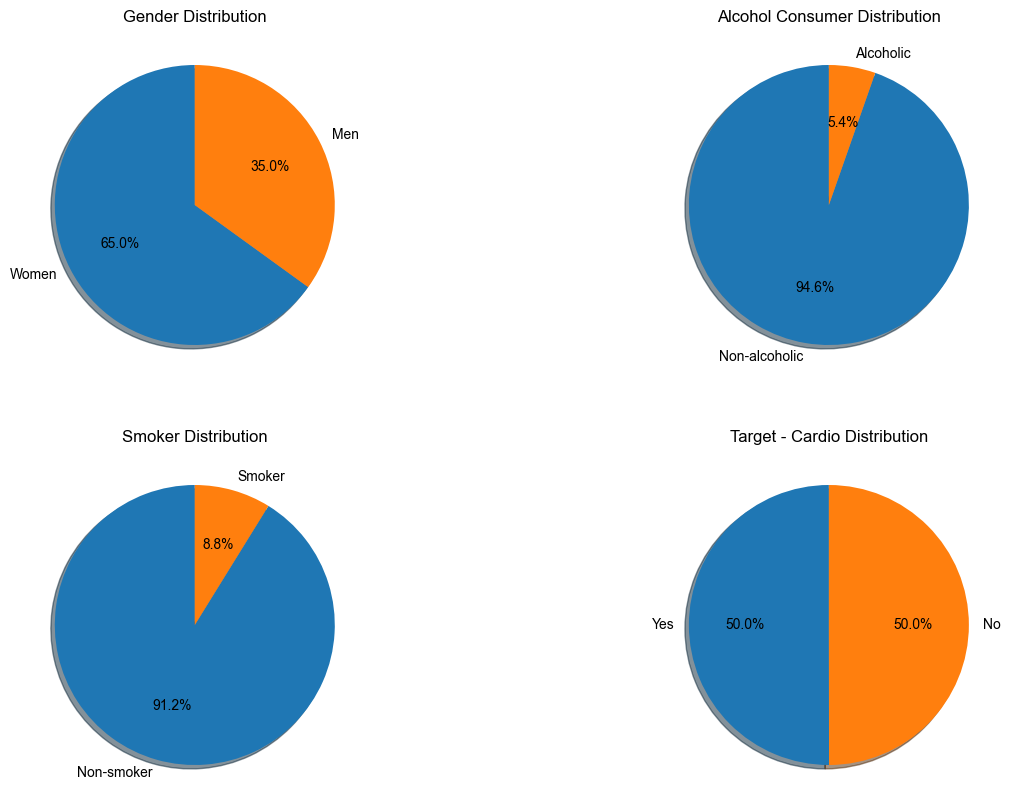

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Count the occurrences of each gender
gender_counts = data_['gender'].value_counts()

# Plot a pie chart for gender using Seaborn color palette
axes[0][0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
axes[0][0].set_title('Gender Distribution')

# Count the occurrences of each smoking status
smoke_counts = data_['smoke'].value_counts()

# Plot a pie chart for smoking status using Seaborn color palette
axes[1][0].pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
axes[1][0].set_title('Smoker Distribution')

alco_counts = data_['alco'].value_counts()
axes[0][1].pie(alco_counts, labels=alco_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
axes[0][1].set_title('Alcohol Consumer Distribution')


cardio_counts = data_['cardio'].value_counts()
axes[1][1].pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
axes[1][1].set_title('Target - Cardio Distribution')


sns.set(style="whitegrid")
sns.despine(left=True, bottom=True)

plt.show()

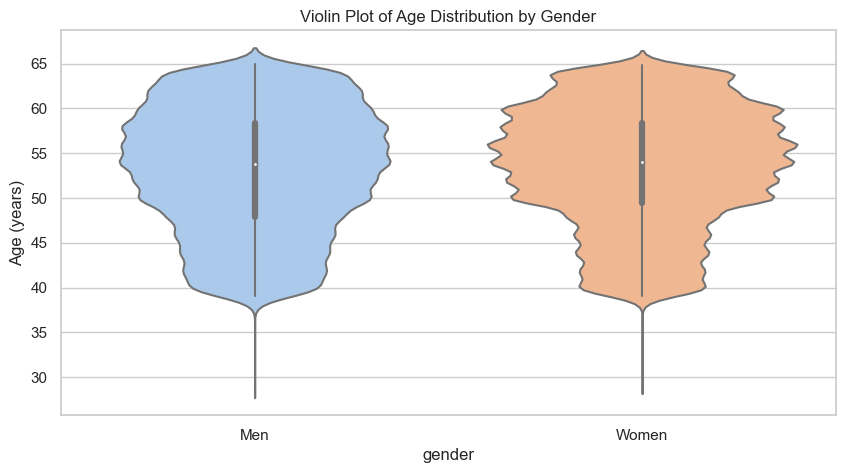

In [15]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='gender', y='age', data=data_, palette='pastel', split=True)
plt.title('Violin Plot of Age Distribution by Gender')
plt.ylabel('Age (years)')
plt.show()

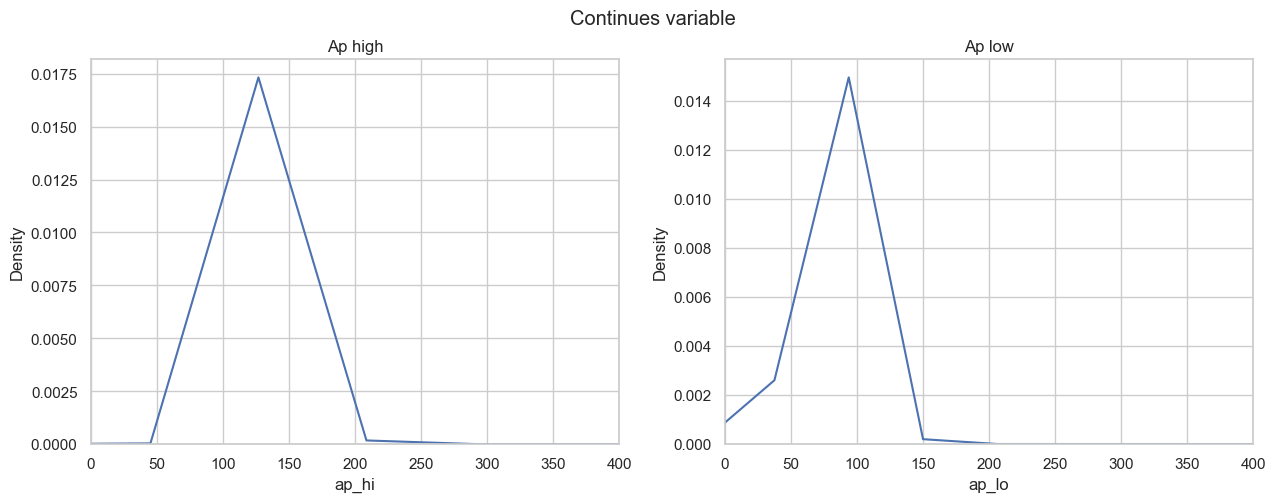

In [16]:
# Checking for distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Continues variable')


#create boxplot in each subplot
sns.kdeplot( x=data_['ap_hi'], ax=axes[0])
axes[0].set_title("Ap high" )
axes[0].set_xlim(0, 400)

sns.kdeplot( x=data_['ap_lo'], ax=axes[1])
axes[1].set_title('Ap low')
axes[1].set_xlim(0, 400)
plt.show()

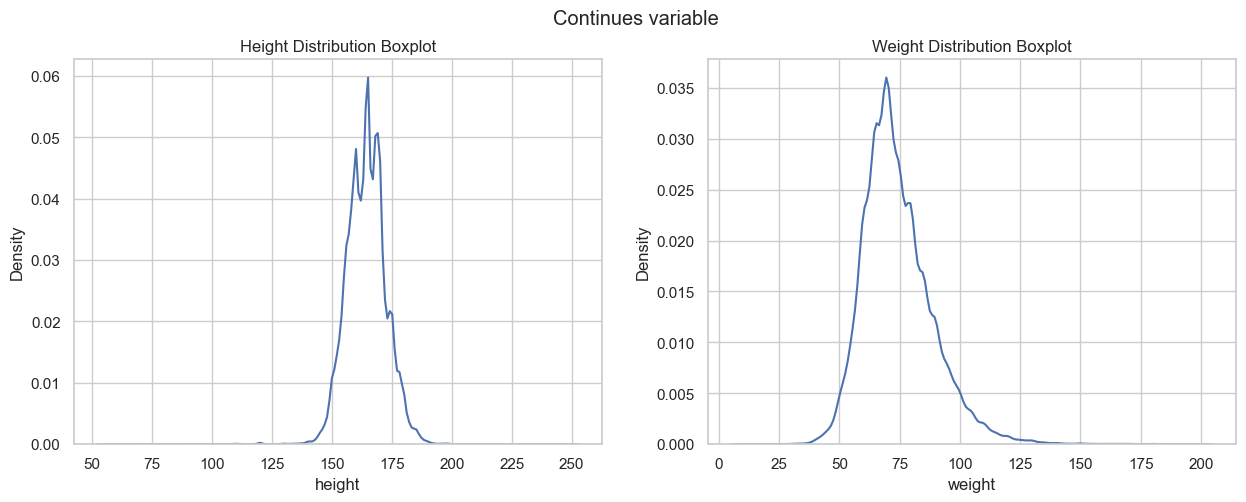

In [17]:
# Checking for distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Continues variable')


#create boxplot in each subplot
sns.kdeplot( x=data_['height'], ax=axes[0])
axes[0].set_title("Height Distribution Boxplot" )

sns.kdeplot( x=data_['weight'], ax=axes[1])
axes[1].set_title('Weight Distribution Boxplot')

plt.show()

In [18]:
#Pandas Profiling
from ydata_profiling import ProfileReport
report = ProfileReport(data_)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Label Encoding

In [19]:
data_['gender'] = data_['gender'].replace({ 'Women':1, 'Men':0})
data_['cholesterol'] = data_['cholesterol'].replace({ 'Normal':1, 'Above normal':2,'Well above normal':3})
data_['gluc'] = data_['gluc'].replace( { 'Normal':1, 'Above normal':2,'Well above normal':3})
data_['smoke'] = data_['smoke'].replace({ 'Non-smoker':0, 'Smoker':1})
data_['alco'] = data_['alco'].replace({ 'Non-alcoholic':0, 'Alcoholic':1})
data_['active'] = data_['active'].replace({'Non-active':0, 'Active':1})
data_['cardio'] = data_['cardio'].replace({'Yes':0, 'No':1})

/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/3363391680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['gender'] = data_['gender'].replace({ 'Women':1, 'Men':0})
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/3363391680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['cholesterol'] = data_['cholesterol'].replace({ 'Normal':1, 'Above normal':2,'Well above normal':3})
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/3363391680.py:3: Se

## Dealing with outliers - IQR.

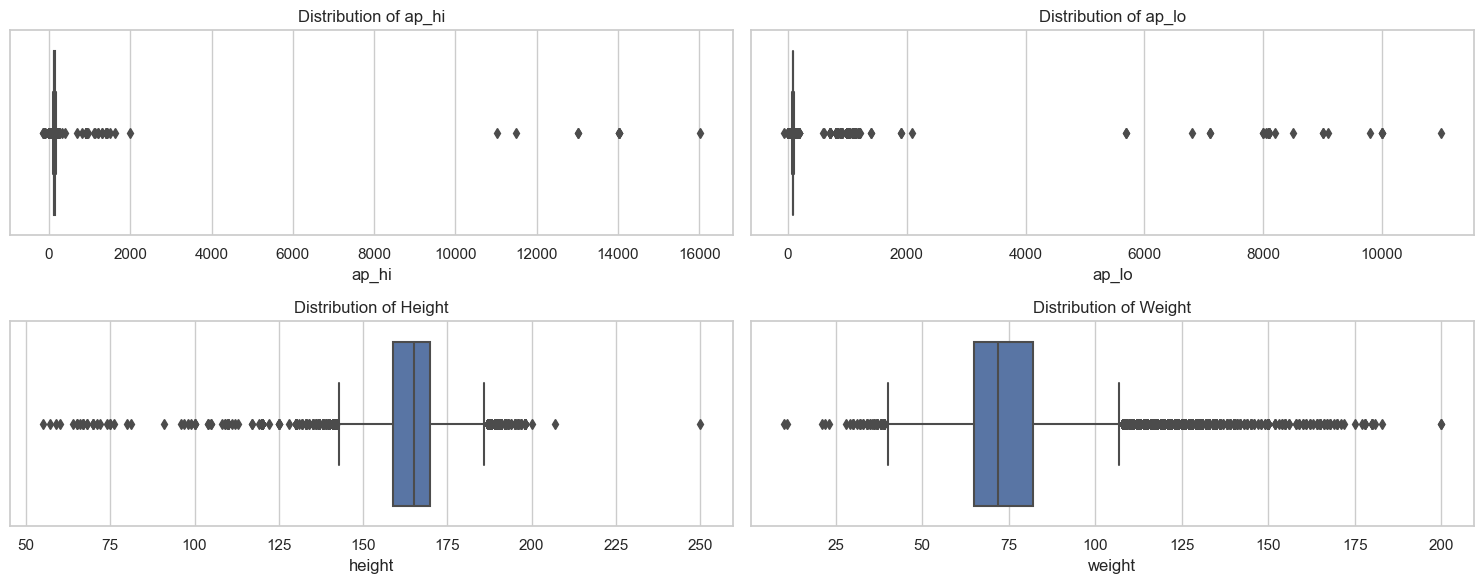

In [20]:
# Outlier Analysis for key numerical columns: 'ap_hi', 'ap_lo', 'height', and 'weight'

# Creating boxplots to visualize outliers
plt.figure(figsize=(15, 6))

# Blood Pressure: ap_hi
plt.subplot(2, 2, 1)
sns.boxplot(x=data_['ap_hi'])
plt.title('Distribution of ap_hi')

# Blood Pressure: ap_lo
plt.subplot(2, 2, 2)
sns.boxplot(x=data_['ap_lo'])
plt.title('Distribution of ap_lo')

# Height
plt.subplot(2, 2, 3)
sns.boxplot(x=data_['height'])
plt.title('Distribution of Height')

# Weight
plt.subplot(2, 2, 4)
sns.boxplot(x=data_['weight'])
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

In [21]:
# Identifying outliers using the IQR method
Q1 = data_.quantile(0.25)
Q3 = data_.quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers in the dataset
outliers = ((data_ < lower_bound) | (data_ > upper_bound))
outlier_counts = outliers.sum().sort_values(ascending=False)

# Displaying columns with outlier counts
outlier_counts[outlier_counts > 0]


active    13579
gluc      10384
smoke      6092
ap_lo      4566
alco       3713
weight     1794
ap_hi      1411
height      514
age           4
dtype: int64

In [22]:
# Capping outliers in the numerical columns
numerical_columns = ['age', 'ap_hi', 'ap_lo', 'height' , 'weight']

for col in numerical_columns:
    data_[col] = np.where(data_[col] > upper_bound[col], 
                                             upper_bound[col], 
                                             data_[col])
    data_[col] = np.where(data_[col] < lower_bound[col], 
                                             lower_bound[col], 
                                             data_[col])

# Re-checking outliers after capping
outliers_after_capping = ((data_[numerical_columns] < lower_bound[numerical_columns]) | 
                          (data_[numerical_columns] > upper_bound[numerical_columns]))
outlier_counts_after_capping = outliers_after_capping.sum().sort_values(ascending=False)
outlier_counts_after_capping

/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/1424994578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_[col] = np.where(data_[col] > upper_bound[col],
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/1424994578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_[col] = np.where(data_[col] < lower_bound[col],


age       0
ap_hi     0
ap_lo     0
height    0
weight    0
dtype: int64

In [23]:
#Checking rows after data preprocessing.
data_.shape

(69098, 13)

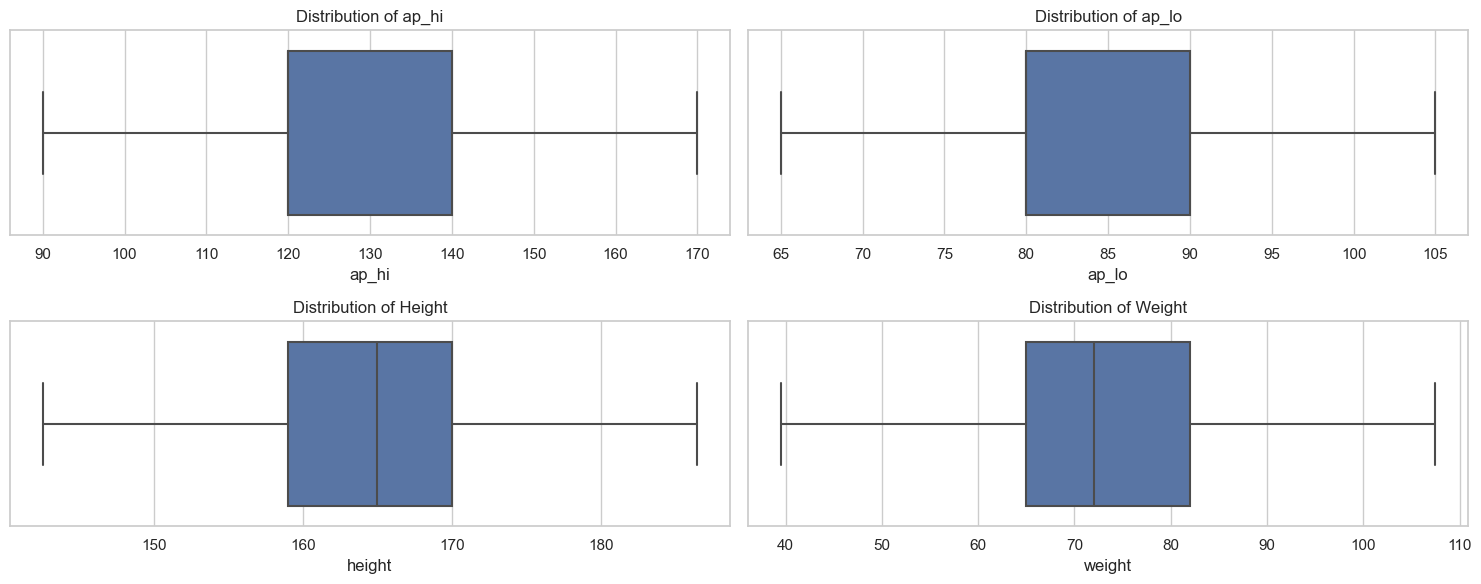

In [24]:
# Outlier Analysis for key numerical columns: 'ap_hi', 'ap_lo', 'height', and 'weight' after outlier correction

# Creating boxplots to visualize outliers
plt.figure(figsize=(15, 6))

# Blood Pressure: ap_hi
plt.subplot(2, 2, 1)
sns.boxplot(x=data_['ap_hi'])
plt.title('Distribution of ap_hi')

# Blood Pressure: ap_lo
plt.subplot(2, 2, 2)
sns.boxplot(x=data_['ap_lo'])
plt.title('Distribution of ap_lo')

# Height
plt.subplot(2, 2, 3)
sns.boxplot(x=data_['height'])
plt.title('Distribution of Height')

# Weight
plt.subplot(2, 2, 4)
sns.boxplot(x=data_['weight'])
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

## Column Addition and Removal

In [25]:
#Replacing height and weight with BMI
data_['BMI'] = (data_['weight'] / (data_['height'] / 100) ** 2).round(2)

# Drop the 'weight' and 'height' columns
data_.drop(['weight', 'height'], axis=1, inplace=True)
data_.head()

/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/148170474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['BMI'] = (data_['weight'] / (data_['height'] / 100) ** 2).round(2)
/var/folders/gw/f4x0tzwn3nq0sqq89mb88_s00000gn/T/ipykernel_14018/148170474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_.drop(['weight', 'height'], axis=1, inplace=True)


id    age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0   0  50.36       0  110.0   80.0            1     1      0     0       1   
1   1  55.38       1  140.0   90.0            3     1      0     0       1   
2   2  51.63       1  130.0   70.0            3     1      0     0       0   
3   3  48.25       0  150.0  100.0            1     1      0     0       1   
4   4  47.84       1  100.0   65.0            1     1      0     0       0   

   cardio    BMI  
0       0  21.97  
1       1  34.93  
2       1  23.51  
3       1  28.71  
4       0  23.01

In [26]:
#dropping id
data_ = data_.drop(columns = ['id'])
data_.head()

age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0  50.36       0  110.0   80.0            1     1      0     0       1   
1  55.38       1  140.0   90.0            3     1      0     0       1   
2  51.63       1  130.0   70.0            3     1      0     0       0   
3  48.25       0  150.0  100.0            1     1      0     0       1   
4  47.84       1  100.0   65.0            1     1      0     0       0   

   cardio    BMI  
0       0  21.97  
1       1  34.93  
2       1  23.51  
3       1  28.71  
4       0  23.01

In [27]:
data_.head()

age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0  50.36       0  110.0   80.0            1     1      0     0       1   
1  55.38       1  140.0   90.0            3     1      0     0       1   
2  51.63       1  130.0   70.0            3     1      0     0       0   
3  48.25       0  150.0  100.0            1     1      0     0       1   
4  47.84       1  100.0   65.0            1     1      0     0       0   

   cardio    BMI  
0       0  21.97  
1       1  34.93  
2       1  23.51  
3       1  28.71  
4       0  23.01

## Train Test Split

In [28]:
# select the features and target as X and y respectively
x = data_.drop(['cardio'], axis=1)
y = data_['cardio']

#split data into a 70:30 training test split respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

## Feature Engineering

### Correlation Matrix

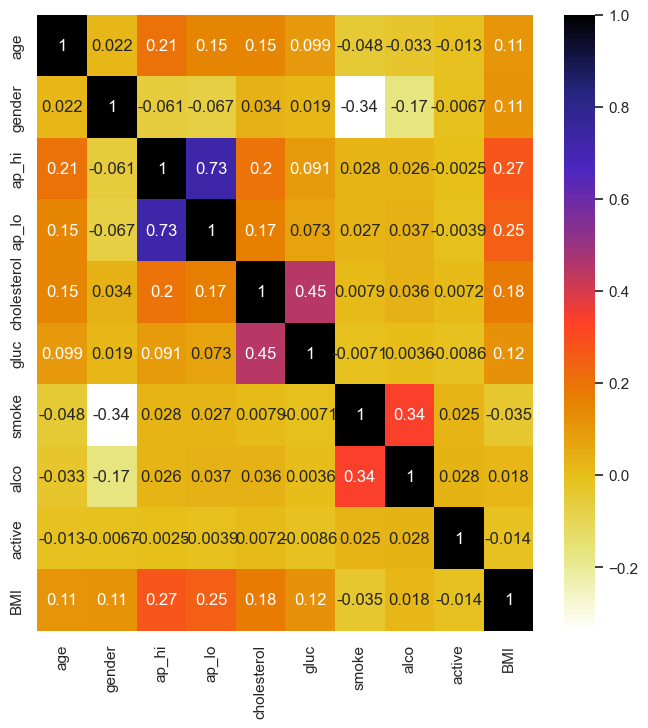

In [29]:
plt.figure(figsize=(8,8))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
correlation_with_target = x_train.apply(lambda x: x.corr(y_train))

# Print the correlation with the target
print("Correlation with Target:")
print(correlation_with_target)

# Identify important features based on correlation with the target variable
important_features = correlation_with_target.abs().sort_values(ascending=False).index

# Print important features
print("\nImportant Features:")
print(important_features)

Correlation with Target:
age            0.236719
gender        -0.006911
ap_hi          0.434110
ap_lo          0.355246
cholesterol    0.218843
gluc           0.086561
smoke         -0.015406
alco          -0.006691
active        -0.032589
BMI            0.199403
dtype: float64

Important Features:
Index(['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'gluc', 'active',
       'smoke', 'gender', 'alco'],
      dtype='object')


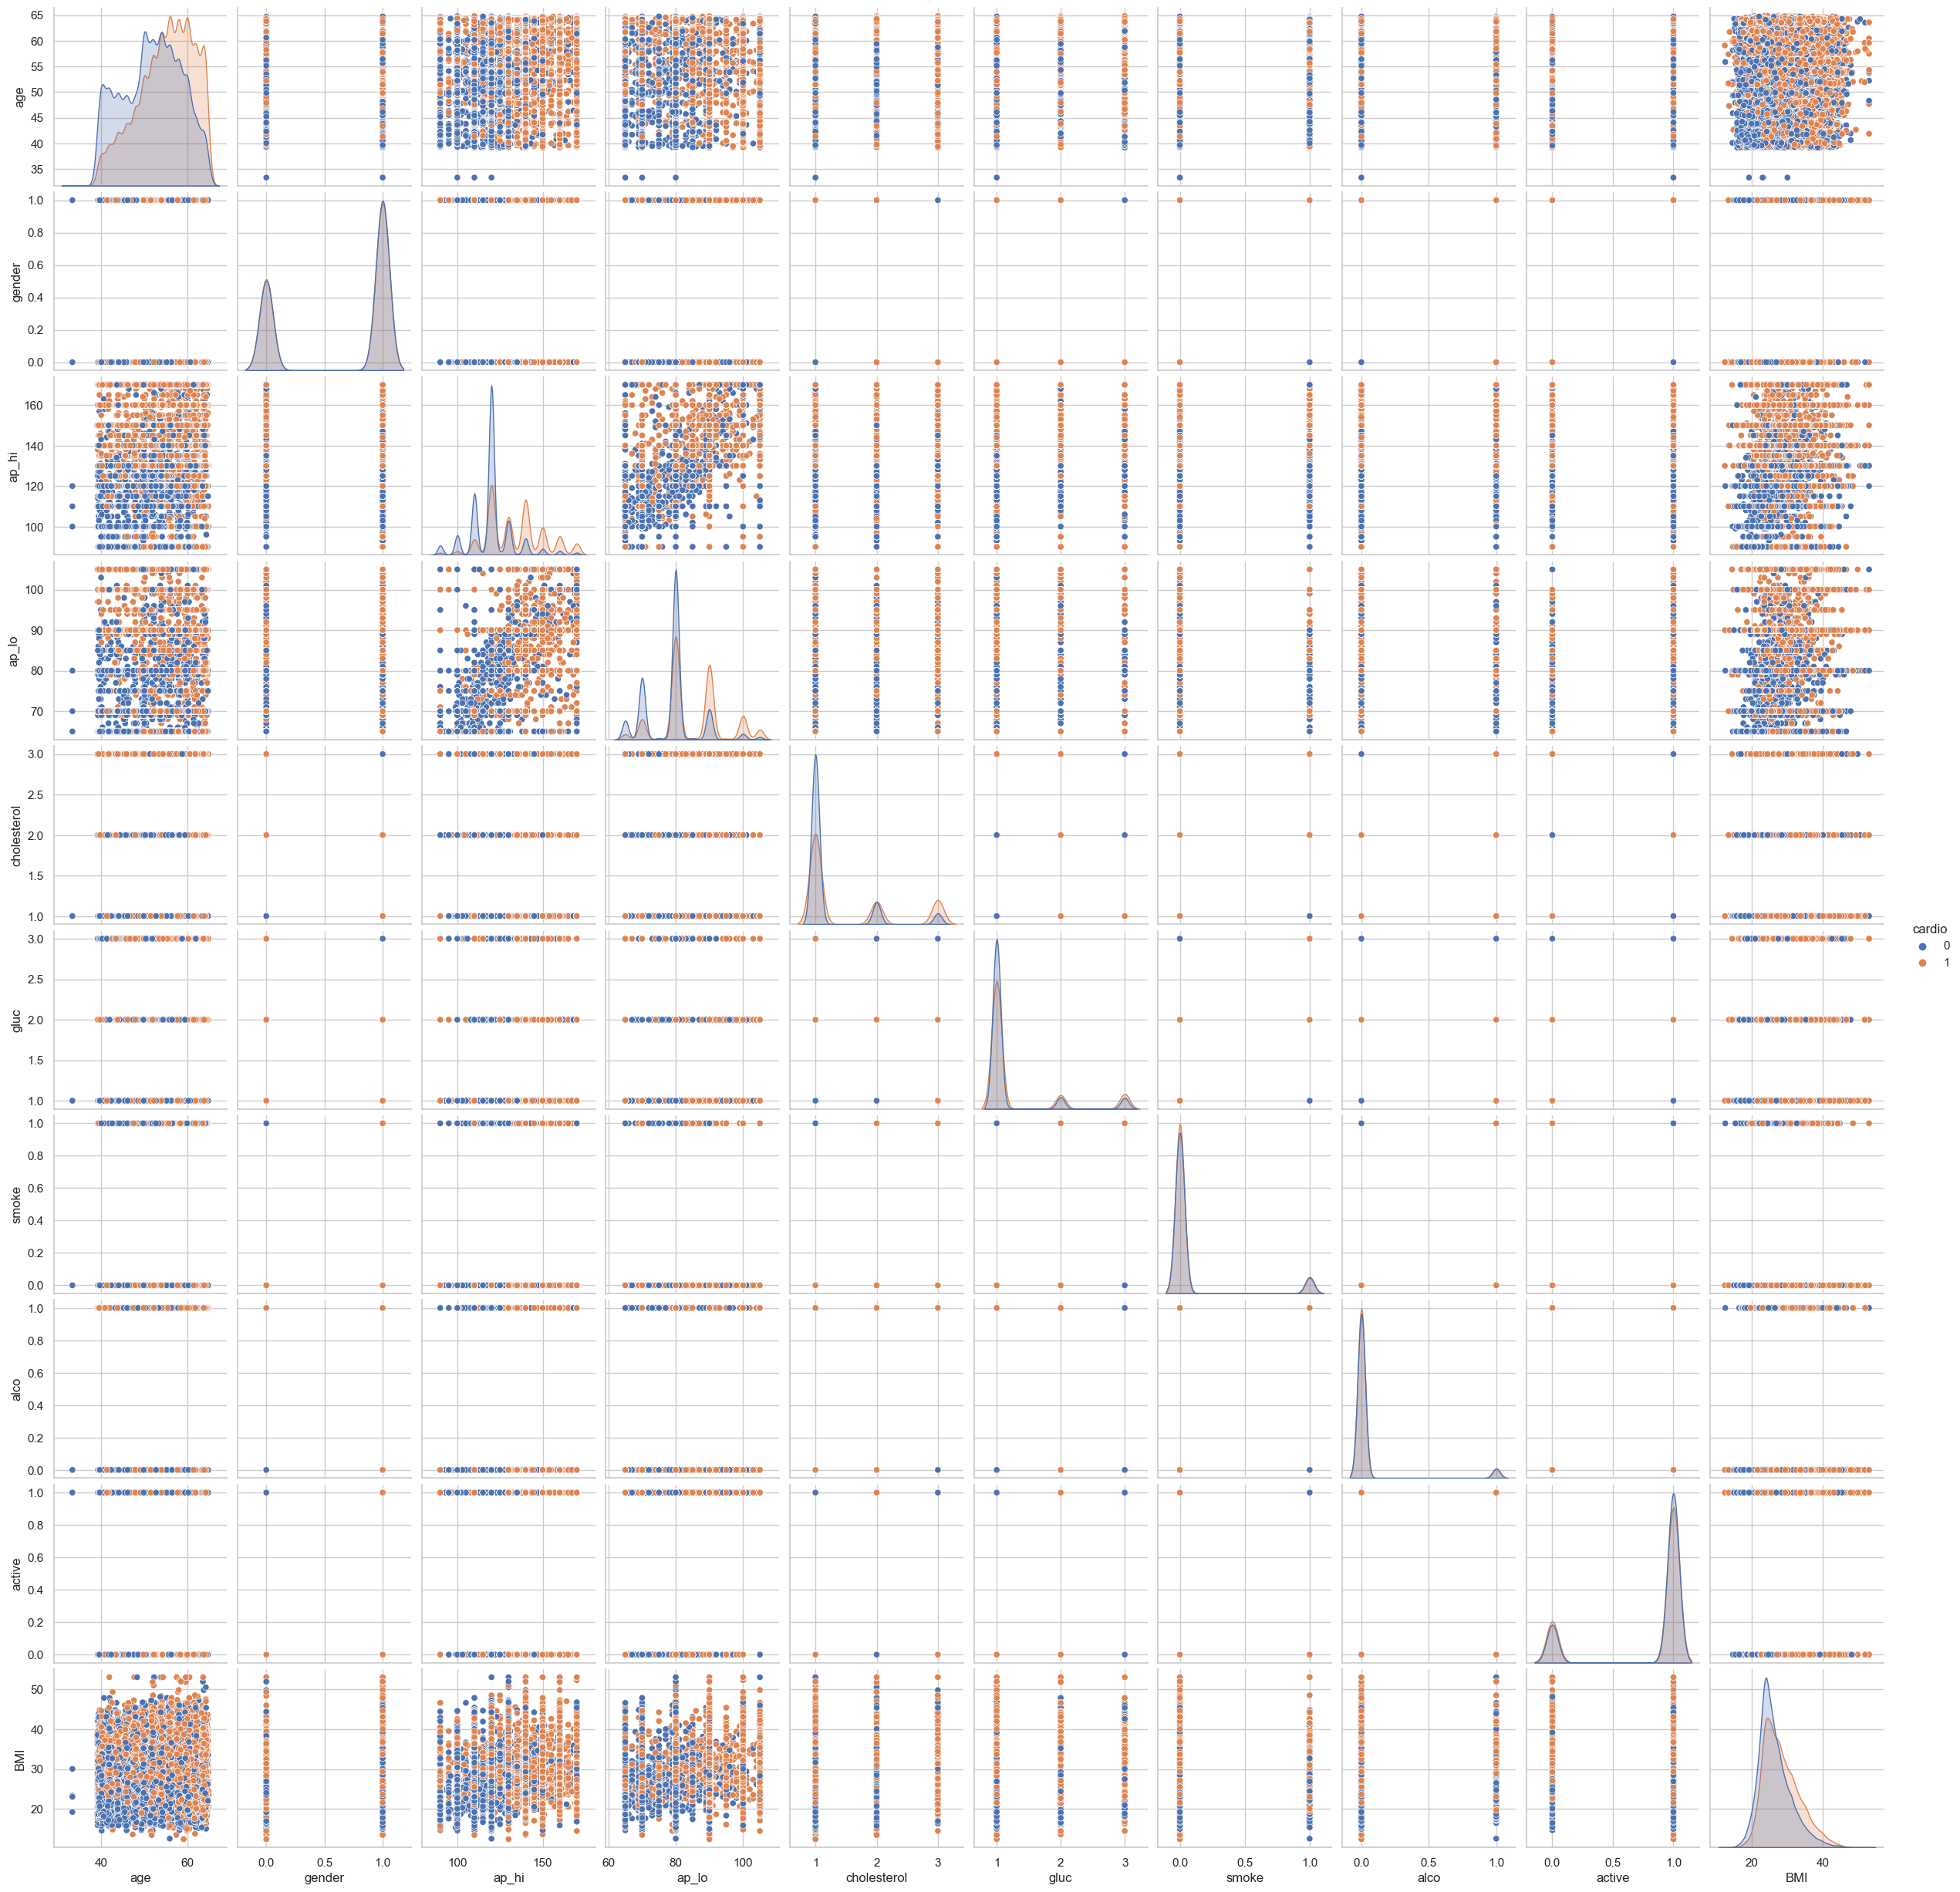

In [31]:
columns_to_plot = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active','BMI', 'cardio']
sns.pairplot(data_[columns_to_plot], hue='cardio')

# Show the plot
plt.show()

### chi2 Method

In [32]:
from sklearn.feature_selection import chi2

In [33]:
x = x_train.drop(columns=['age','ap_hi','ap_lo','BMI'])
x

gender  cholesterol  gluc  smoke  alco  active
35381       0            2     1      0     0       1
65303       0            1     3      0     0       1
12938       1            1     1      0     0       0
67541       1            1     1      0     0       0
52237       1            2     1      0     0       1
...       ...          ...   ...    ...   ...     ...
33359       1            2     1      0     0       0
12834       0            1     1      0     0       1
52073       0            1     1      0     0       1
66244       0            3     1      0     0       1
23220       1            1     1      0     0       0

[48368 rows x 6 columns]

In [34]:
chi_score = chi2(x,y_train)
chi_score

(array([  0.80762789, 785.36028454,  96.16877444,  10.47226829,
          2.04967936,  10.11075985]),
 array([3.68822496e-001, 8.22309704e-173, 1.05495712e-022, 1.21179839e-003,
        1.52238248e-001, 1.47406177e-003]))

<Axes: >

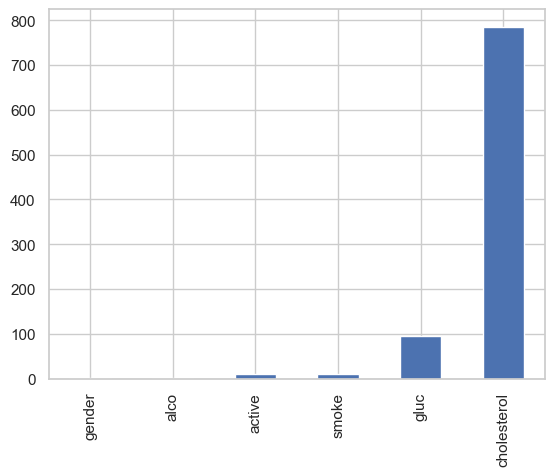

In [35]:
#higher chi values , higher importance
chi_values = pd.Series(chi_score[0],index = x.columns)
chi_values.sort_values(ascending = True,inplace = True)
chi_values.plot.bar()

<Axes: >

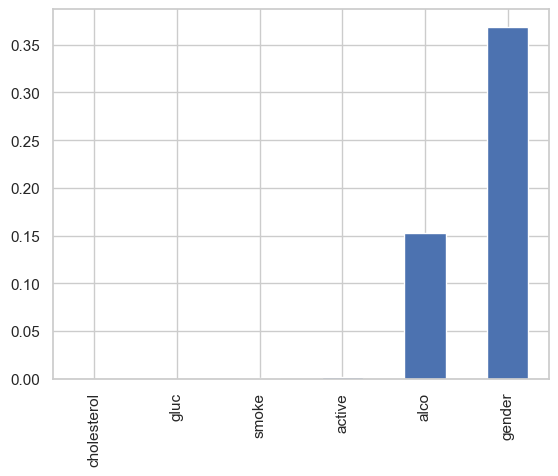

In [36]:
#higher the p values, lower the importance
p_values = pd.Series(chi_score[1],index = x.columns)
p_values.sort_values(ascending = True,inplace = True)
p_values.plot.bar()

### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Assume X_train and Y_train are already defined and preprocessed
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
importances = rf.feature_importances_

In [39]:
# Assume X_train is a DataFrame so we can use the column names
feature_importances = pd.Series(importances, index=x_train.columns)

# Sort the feature importances by most important first
feature_importances_sorted = feature_importances.sort_values(ascending=False)

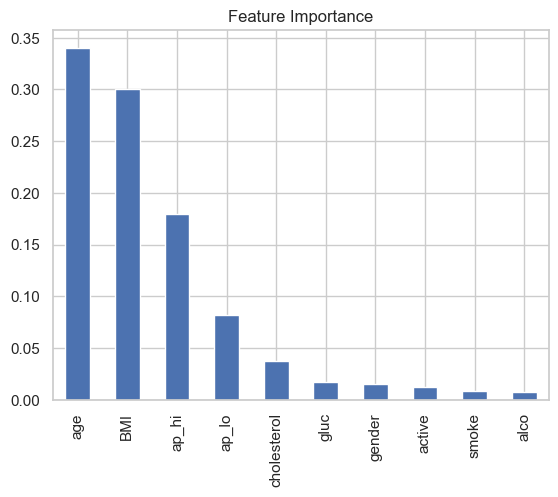

In [40]:
# Visualize the feature importances in a bar chart
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importance in RF')
plt.show()

### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

# Assume X_train and Y_train are already defined and preprocessed
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/Users/mihirdholakia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
coefficients = logreg.coef_[0]

In [43]:
# Convert the coefficients to a pandas Series
feature_importance = pd.Series(coefficients, index=x_train.columns)

# Sort features by the absolute value of their coefficient
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

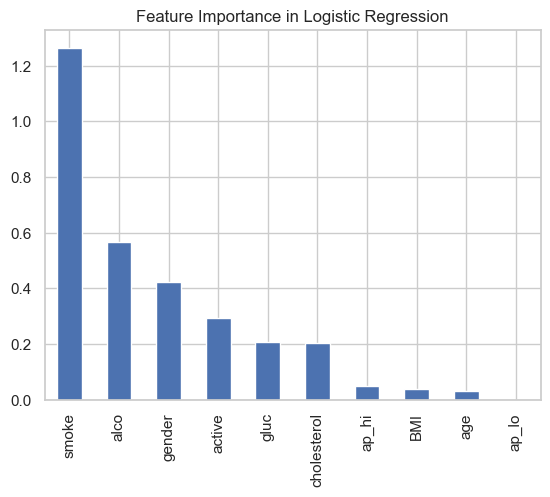

In [44]:
import matplotlib.pyplot as plt

# Visualize the feature importances in a bar chart
feature_importance_sorted.plot(kind='bar')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Dropping Column

In [45]:
x_train = x_train.drop('alco',axis=1)
x_test = x_test.drop('alco',axis=1)

### Functions to calculate Metrics for Classification Models

In [46]:
models_accuracy= {}
def Acc_cal(Model_name,y_test, y_pred):
    #from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
    #calculating accuracy, precision, recall and F1 score
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=0)
    rec = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)

    arr = [[Model_name,acc,prec,rec,f1]]
    models_accuracy[Model_name]=acc
    df_ = pd.DataFrame(arr,columns=['Model','Accuracy','Precision','Recall','F1 Score'])
    df_
    return df_

In [47]:
def conf_mat(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    #plotting COnfusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## Modeling

### kNN Classifier

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#training the k-neighbours classifier 
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
#print('Accuracy for k = 50 is '+str(Acc_cal(y_test, predictions)))
Acc_cal('KNeighborsClassifier',y_test, y_pred)

Model  Accuracy  Precision    Recall  F1 Score
0  KNeighborsClassifier  0.728992   0.706589  0.783213   0.74293

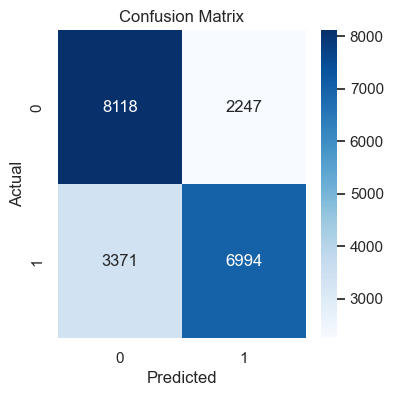

In [49]:
conf_mat(y_test, y_pred)

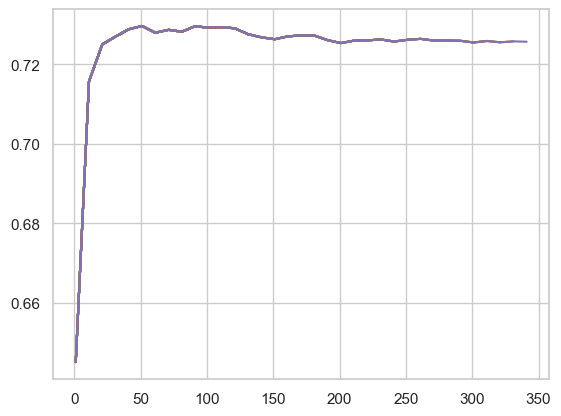

In [50]:
#for a better overview, we train the classifier for k= 1 to k= 15 to get a better overview of the knn classifier trend
prediction_array = []
arr = []
for i in range(1,350,10):
    arr.append(i)
    
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    
    predictions = classifier.predict(x_test)
    prediction_array.append(accuracy_score(y_test, predictions))
    plt.plot(arr,prediction_array),prediction_array

### GaussianNB

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#Train Naive Bayes classifier 
nbc=GaussianNB()
nbc.fit(x_train,y_train)

# Make predictions on the test data
y_pred=nbc.predict(x_test)

In [52]:
Acc_cal('GaussianNB',y_test, y_pred)

Model  Accuracy  Precision    Recall  F1 Score
0  GaussianNB  0.712639   0.678259  0.809069  0.737912

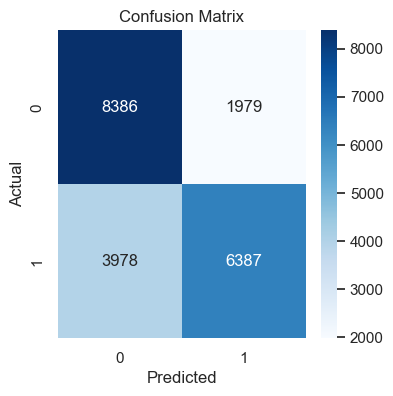

In [53]:
conf_mat(y_test, y_pred)

### Decision tree

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth = 5, random_state=42)

decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [55]:
y_pred=decision_tree_classifier.predict(x_test)

In [56]:
Acc_cal('DecisionTreeClassifier',y_test, y_pred)

Model  Accuracy  Precision   Recall  F1 Score
0  DecisionTreeClassifier  0.730487   0.706126  0.78958  0.745525

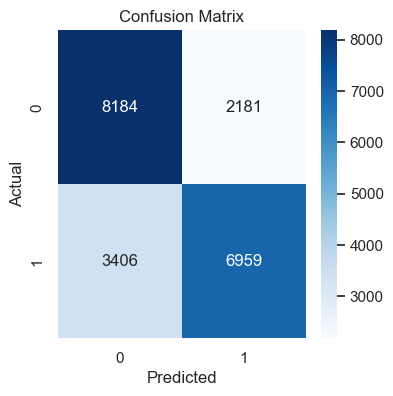

In [57]:
conf_mat(y_test, y_pred)

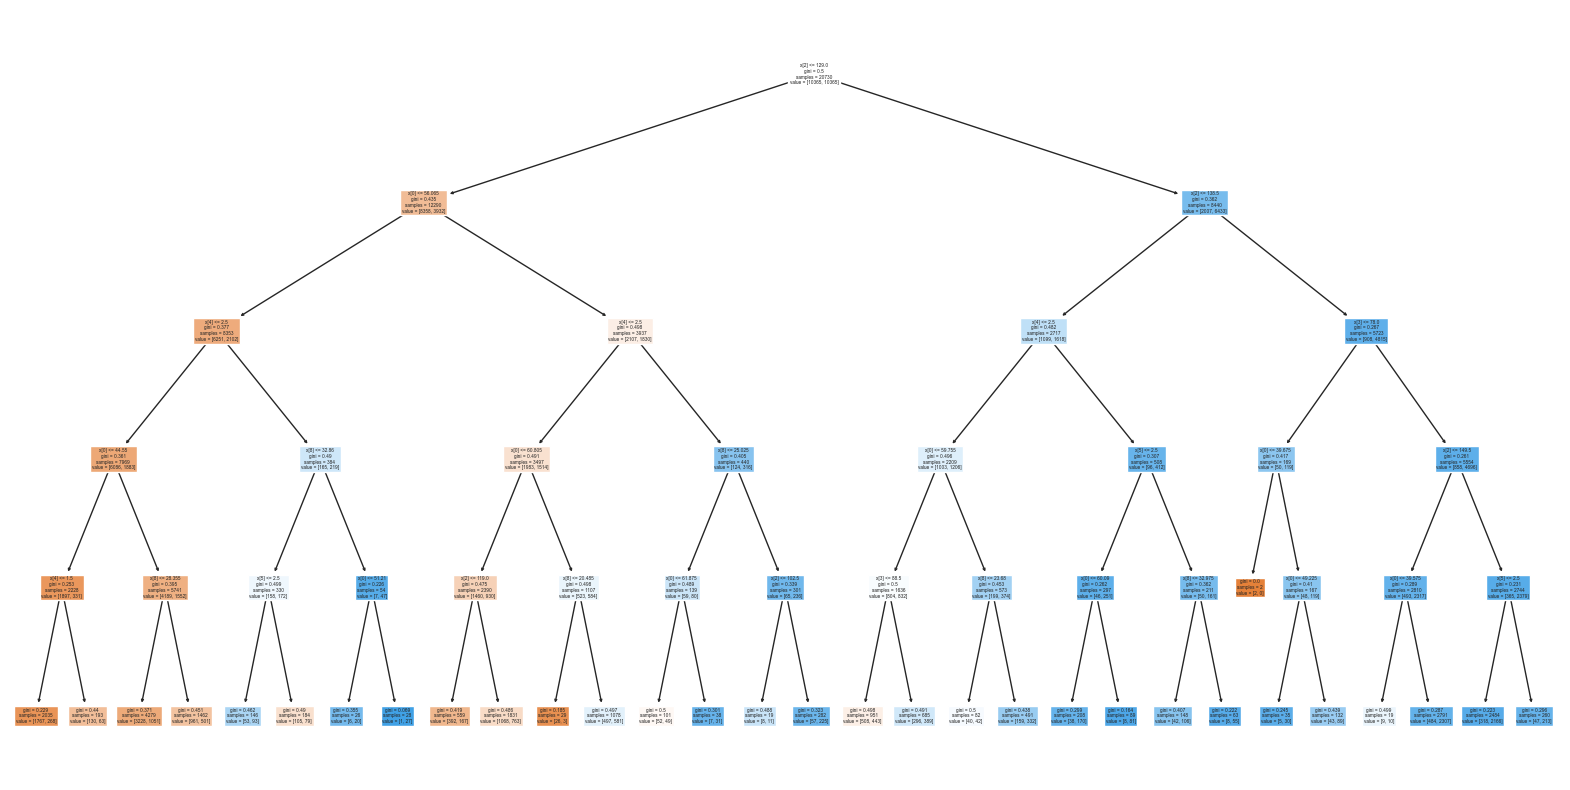

In [58]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree_classifier.fit(x_test,y_test), filled=True)
plt.show()

### SVM

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

svm_model = SVC()

# Fitting the model
svm_model.fit(x_train, y_train)

# Making predictions
y_pred = svm_model.predict(x_test)

In [60]:
Acc_cal('svm_model',y_test, y_pred)

Model  Accuracy  Precision    Recall  F1 Score
0  svm_model  0.726146   0.694394  0.807815  0.746822

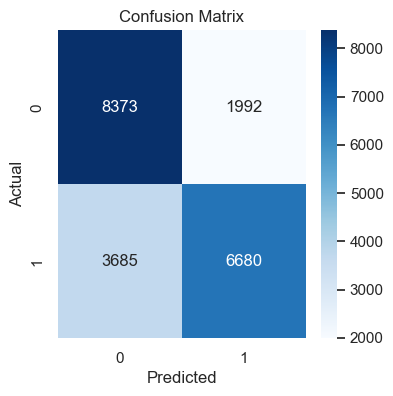

In [61]:
conf_mat(y_test, y_pred)

### AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create AdaBoost model with DecisionTree as the base learner
base_learner = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_learner, n_estimators=50, random_state=42)

# Train AdaBoost model
ada_boost.fit(x_train, y_train)

# Make predictions on the testing set
predictions = ada_boost.predict(x_test)

In [63]:
Acc_cal('AdaBoostClassifier',y_test, predictions)

Model  Accuracy  Precision    Recall  F1 Score
0  AdaBoostClassifier   0.73068   0.700722  0.805306  0.749383

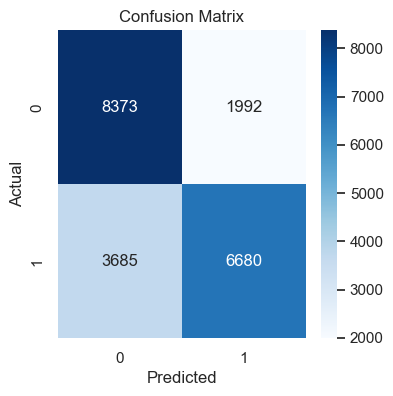

In [64]:
conf_mat(y_test, y_pred)

### Random Forest

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
random_forest_classifier.fit(x_train, y_train)

# Make predictions on the test set
predictions = random_forest_classifier.predict(x_test)

In [66]:
Acc_cal('RandomForest',y_test, predictions)

Model  Accuracy  Precision    Recall  F1 Score
0  RandomForest  0.705499   0.700716  0.717414  0.708967

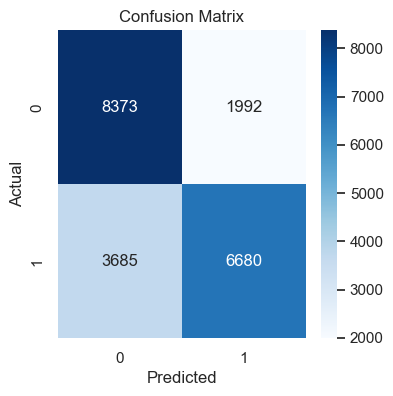

In [67]:
conf_mat(y_test, y_pred)

### Knn with GridSearchCV

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#knn with grid search cv
param_grid = {'n_neighbors': [45,50,55,60], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'}
Best score: 0.7265339555715007


In [69]:
# Predictions on the test set
y_pred = grid_search.predict(x_test)

In [70]:
Acc_cal('Knn with Grid Search CV',y_test, y_pred)

Model  Accuracy  Precision    Recall  F1 Score
0  Knn with Grid Search CV  0.730439   0.707209  0.786493  0.744747

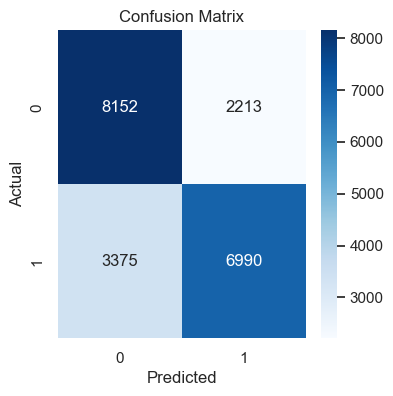

In [71]:
conf_mat(y_test, y_pred)

### Logistic Regression with GridSearchCV

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Set up the grid search with cross-validation
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=2000), param_grid_lr, cv=5)

# Fit the model on training data
grid_search_lr.fit(x_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7273610725894921


In [73]:
# Predictions on the test set
y_pred = grid_search_lr.predict(x_test)

In [74]:
Acc_cal('Logistic Regression with GridSearchCV',y_test, y_pred)

Model  Accuracy  Precision    Recall  \
0  Logistic Regression with GridSearchCV   0.73015    0.70602  0.788712   

   F1 Score  
0  0.745078

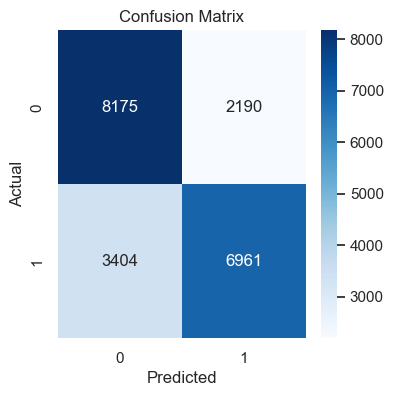

In [75]:
conf_mat(y_test, y_pred)

### ANN

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

abc = []
for i in range(1,50):
    mlp = MLPClassifier(hidden_layer_sizes=(i), max_iter=300, activation='relu', solver='adam', random_state=42)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    abc.append([(accuracy),i])
#print(abc)



In [77]:
max_pair = max(abc, key=lambda x: x[0])
print("Maximum pair:", max_pair)

Maximum pair: [0.7349734684032803, 7]


In [78]:
mlp = MLPClassifier(hidden_layer_sizes=(max_pair[1]), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
Acc_cal('ANN',y_test, y_pred)
    

Model  Accuracy  Precision    Recall  F1 Score
0   ANN  0.734973   0.712838  0.786975  0.748074

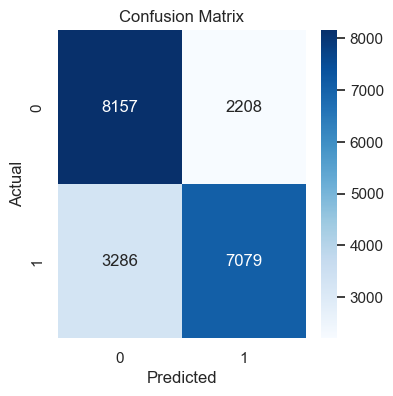

In [79]:
conf_mat(y_test, y_pred)

## Comparision of Accuracy

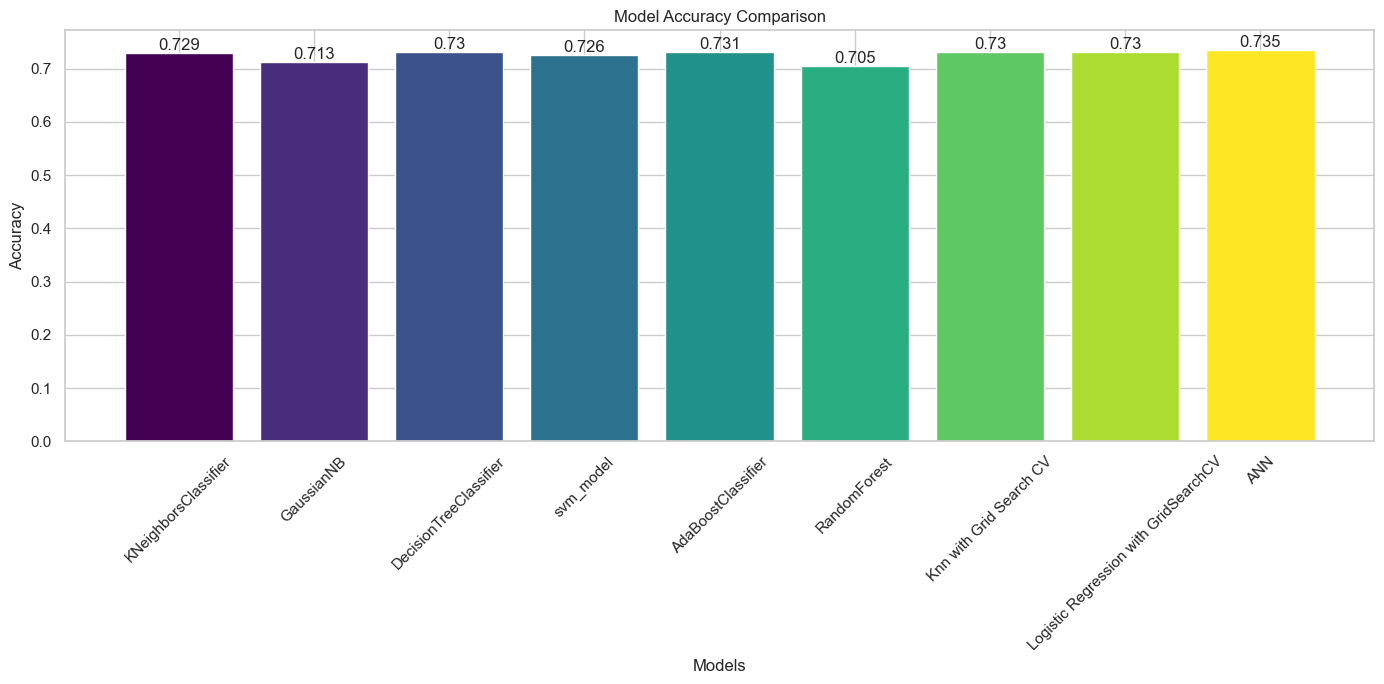

In [80]:
import matplotlib.pyplot as plt


# Names of models
models = list(models_accuracy.keys())
# Corresponding accuracy values
accuracies = list(models_accuracy.values())

# Create a color list
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Create bar plot with different colors for each bar
plt.figure(figsize=(14, 7))
bar_plot = plt.bar(models, accuracies, color=colors)

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Adding value labels on top of each bar
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot with rotated model names for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit everything neatly
plt.show()

In [81]:
#Finding Model with highest Accuracy
max_model = max(models_accuracy, key=models_accuracy.get)
max_score = models_accuracy[max_model]

max_model, max_score

('ANN', 0.7349734684032803)